# HBS BANK - Customer Attrition 

In [6]:
#importing libraries to be used throughout the project for data analysis and data visualization
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sp
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="white",color_codes=True)
mpl.rcParams['figure.figsize'] = (20,5)

In [7]:
#importing data to be used and exploring the data in pandas
data=pd.read_csv('BankChurners.csv')
pd.set_option('max_columns',None)
data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- Our dataset contains 21 columns, 10127 rows, and no missing values.
- Our categorical Variables are of type object and our numerical variables are of types int and float

In [8]:
# deleting unnecessary unique identifier column "CLIENTNUM"
data=data.drop('CLIENTNUM',axis=1)
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [9]:
#looking at descriptive statistics for the data
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


**A few Observations regarding the description of our data:**
-  The avg age of our customers is 46 years old.
-  Bank customers are staying on average for 36 months and have an avg total revolving balance of $1163 and a          0.3 avg Credit Utilization Ratio.

In [10]:
# looking at the average values of variables with regards to Attrition_Flag
data.groupby('Attrition_Flag').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


**Few Observations regarding Attritted customers vs. Existing customers:**
- The avg age of attrited customers is slightly higher than existing customers.
- The avg number of dependents for attrited customers is slightly higher than existing customers.
- The avg length of relationship with the bank for attritted customers is surprisingly longer than existing customer- could be indicative of customer dissatisfaction.
- The avg number of products is understandably lower for attritted than existing customers.
- The avg inactivity duration in months is understandably longer for attritted than existing customers.
- The avg total revolving balance is understandably lower for attritted than existing customers.
- The avg credit limit balance is lower for attritted than existing customers.
- The avg total transaction count and avg total transaction amount are understandably lower for attritted than existing customers.
- The avg of change in total transactions counts and change in total amounts are understandably lower for attritted than existing customers.
- The avg credit utilization rate is understandably lower for attritted than existing customers.

In [11]:
#Looking at the total number of Attritted Customers vs. Existing Customers
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

We have a total of 8500 existing customers and 1627 attritted customers.

In [12]:
#Checking the unique values of our dependent variable
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

The Percentage of attrited Customers is 16.065962279055988
The Percentage of Existing Customers is 83.934037720944


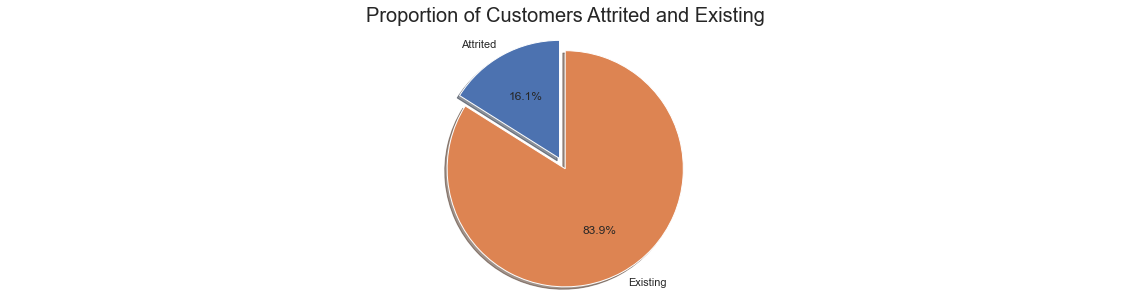

In [13]:
#Calculating and visualizing the percentage of Attritted Customers vs. Existing Customers
Count_Attrited= len(data[data['Attrition_Flag']=="Attrited Customer"])
Count_Existing= len(data[data['Attrition_Flag']=="Existing Customer"])
Pct_Attrition= (Count_Attrited)/(Count_Attrited + Count_Existing)
print('The Percentage of attrited Customers is',Pct_Attrition*100 )
Pct_Existing= (Count_Existing)/(Count_Attrited + Count_Existing)
print('The Percentage of Existing Customers is',Pct_Existing*100 )


labels='Attrited','Existing'
sizes= [Pct_Attrition,Pct_Existing]
explode=(0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Proportion of Customers Attrited and Existing',size=20)
plt.show()

In [14]:
#Separating Numerical Variables labels in a list 

Numerical_Variables=['Customer_Age','Months_on_book','Months_Inactive_12_mon',
                     'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
                    'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1',
                    'Avg_Utilization_Ratio','Total_Relationship_Count']

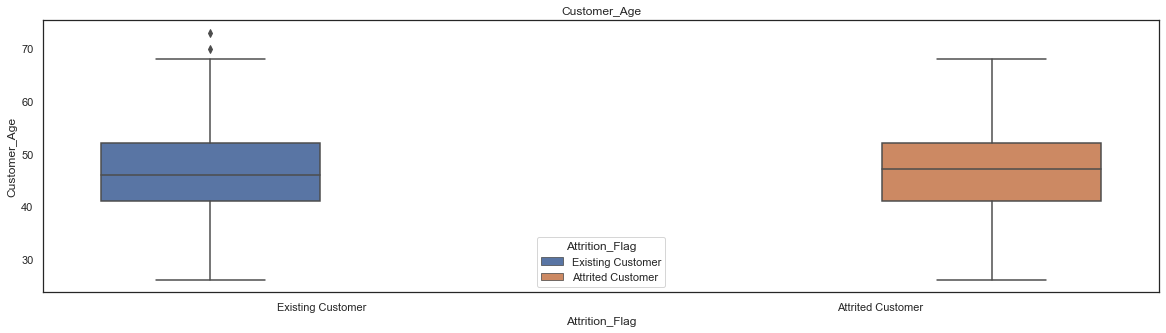

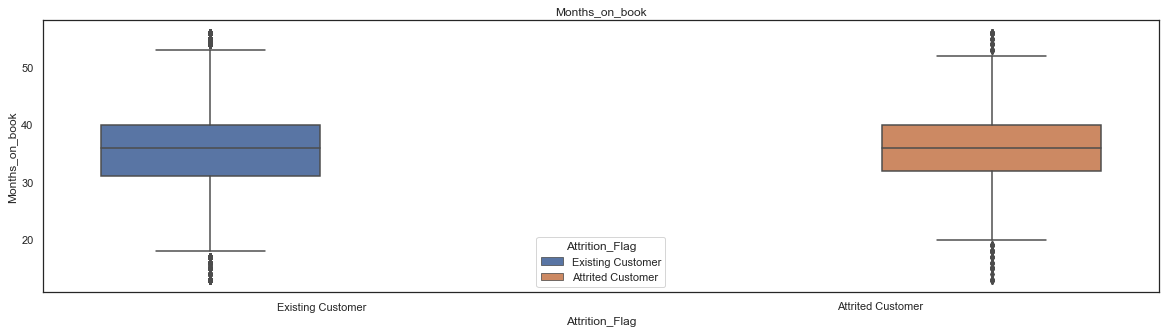

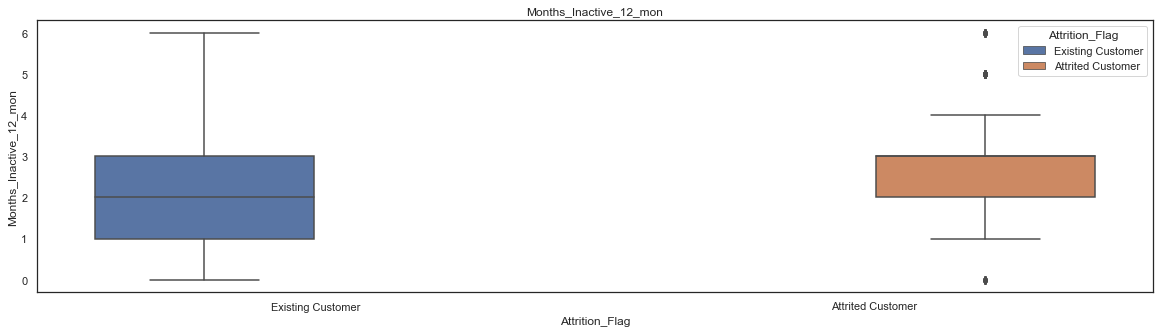

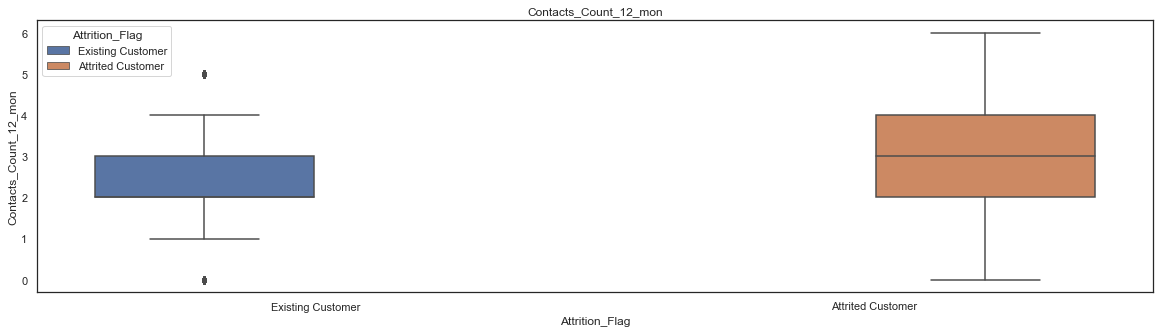

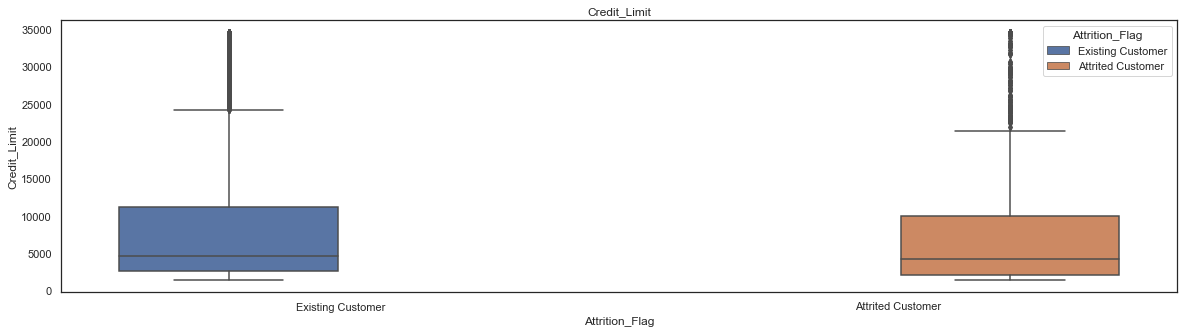

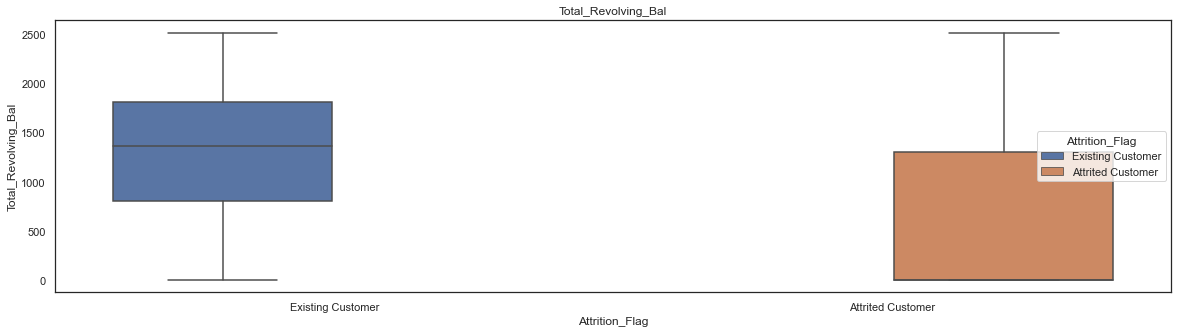

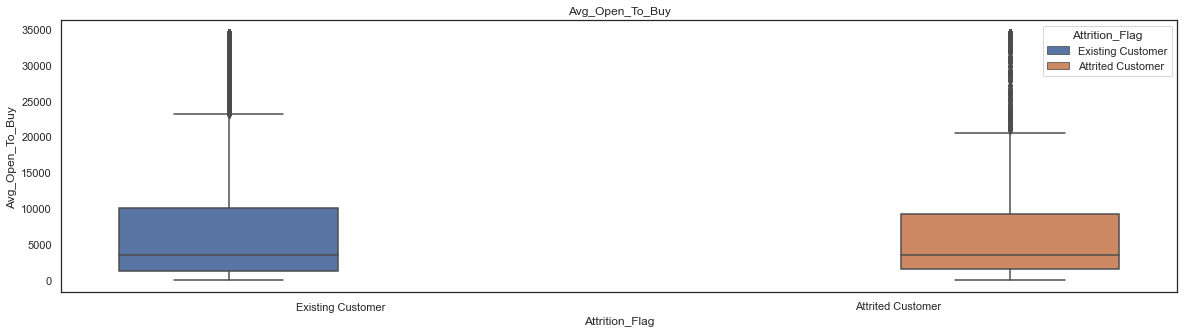

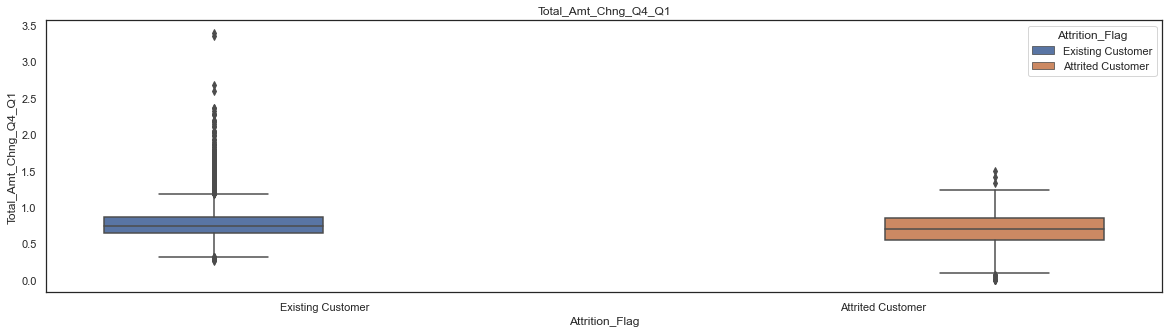

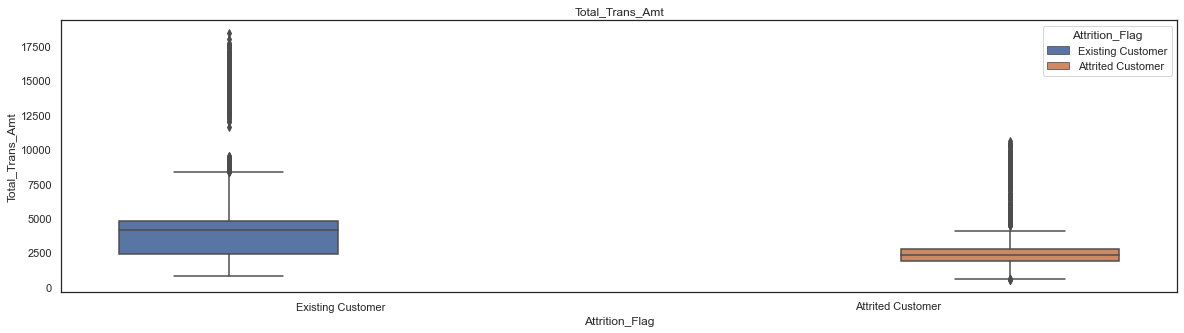

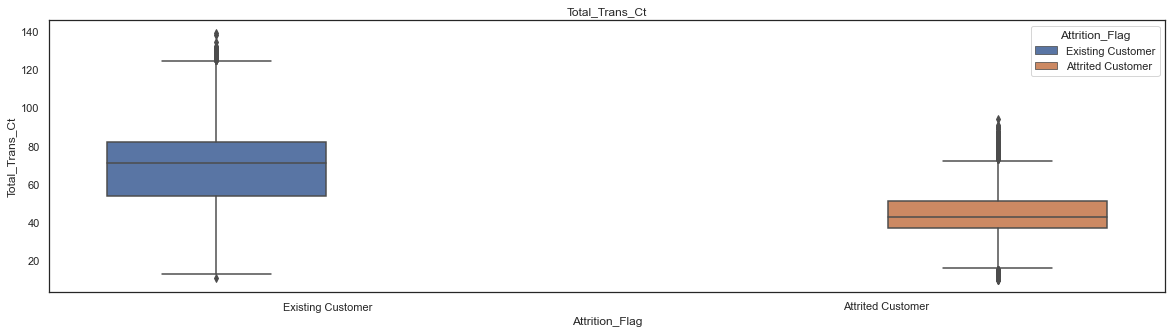

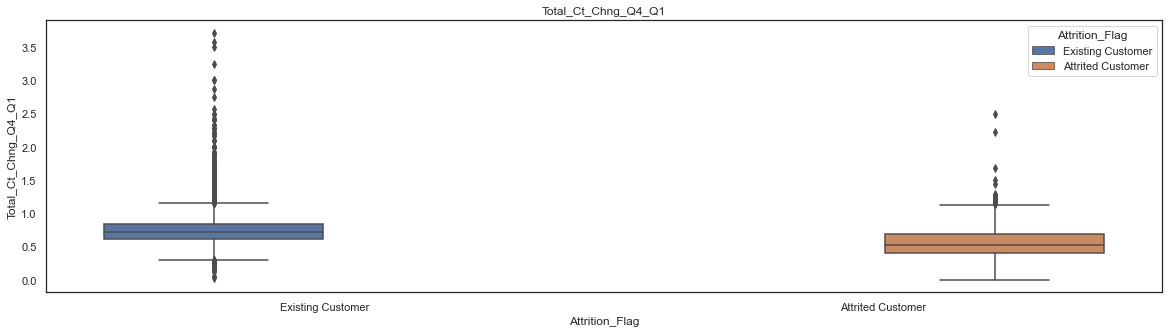

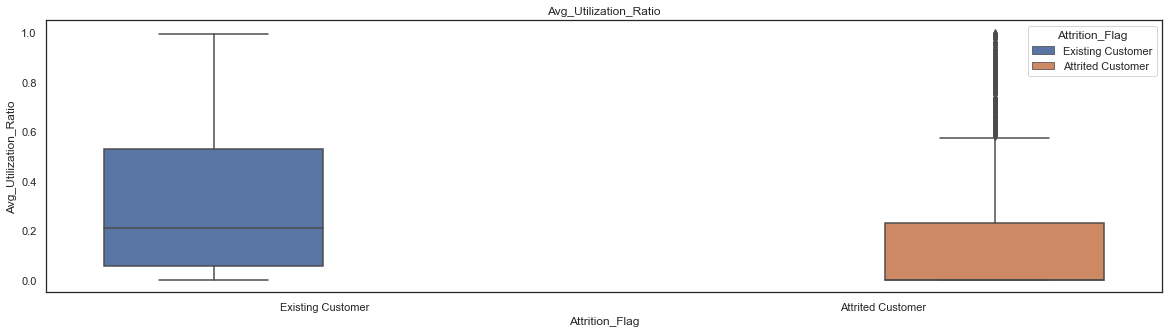

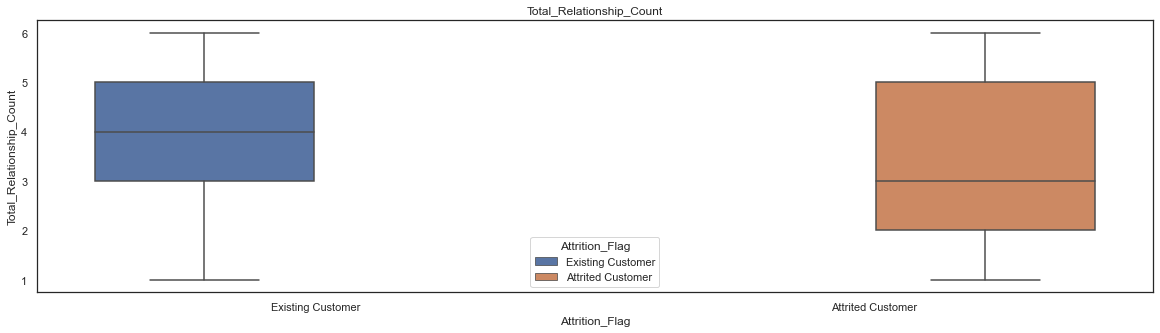

In [15]:
#looking at behavior of Numerical Variables in regards to Attrition
for item in Numerical_Variables:
    fig, ax = plt.subplots()
    sns.boxplot(x='Attrition_Flag',y=item, hue = 'Attrition_Flag',data = data)
    plt.title(item)
plt.show()

**Observations:**
- We can visually note the significance of Customer Age, dependent count,total revolving balance, Utilization rate, total count of transactions, total amount of transactions in determining Attrition.
- An attrited customer customer is more likely to have a higher median age and dependent count than that of existing customer.
- An attrited customer is more likely to have lower values for count,total revolving balance, Utilization rate, total count of transactions, total amount of transactions in determining Attrition, total change in transactions count and amount.

In [48]:
#Runing t-test for Numerical Variables 
from scipy.stats import ttest_ind

for item in Numerical_Variables:
    data0 = data[data['Attrition_Flag']=="Existing Customer"]
    data1 = data[data['Attrition_Flag']=="Attrited Customer"]
    ttest= ttest_ind(data0[item], data1[item])
    
    print("T-test for " + item + ": Statistic = "+ str(ttest.statistic)+", pvalue = "+str(ttest.pvalue))

T-test for Customer_Age: Statistic = -1.8319590211710879, pvalue = 0.06698688501759036
T-test for Months_on_book: Statistic = -1.377341848122166, pvalue = 0.16843702876495353
T-test for Months_Inactive_12_mon: Statistic = -15.52128784291336, pvalue = 1.0326639995929033e-53
T-test for Contacts_Count_12_mon: Statistic = -21.02065769896129, pvalue = 4.6974896307500795e-96
T-test for Credit_Limit: Statistic = 2.4028585836343748, pvalue = 0.016285357205394337
T-test for Total_Revolving_Bal: Statistic = 27.435422507845004, pvalue = 6.630148455415696e-160
T-test for Avg_Open_To_Buy: Statistic = 0.028685370654132375, pvalue = 0.9771160894458855
T-test for Total_Amt_Chng_Q4_Q1: Statistic = 13.302692876619087, pvalue = 4.836642703584486e-40
T-test for Total_Trans_Amt: Statistic = 17.21126707715907, pvalue = 1.857438655660998e-65
T-test for Total_Trans_Ct: Statistic = 40.250735299803345, pvalue = 0.0
T-test for Total_Ct_Chng_Q4_Q1: Statistic = 30.497187021515057, pvalue = 1.6477247846928245e-195


Numerical Variables with T-statistic > T-critical and pvalue < 0.05 indicate significance of below variables:
- Months_Inactive_12_mon
- Contacts_Count_12_mon 
- Total_Revolving_Bal
- Credit Limit
- Total_Amt_Chng_Q4_Q1
- Total_Ct_Chng_Q4_Q1
- Total_Trans_Ct 
- Total_Trans_Amt
- Avg_Utilization_Ratio
- Total_Relationship_Count

                     
                    

In [17]:
#Separating Categorical Variables labels in lists 

Categorical_Variables=['Gender','Dependent_count','Card_Category','Income_Category','Marital_Status',
                       'Education_Level']


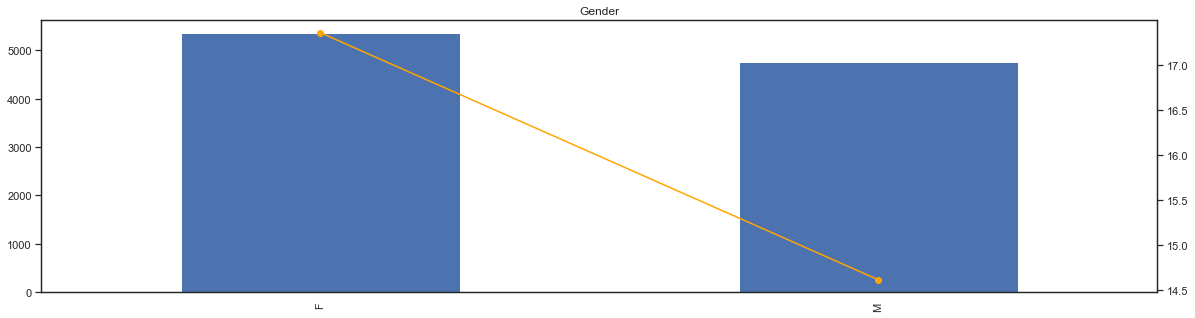

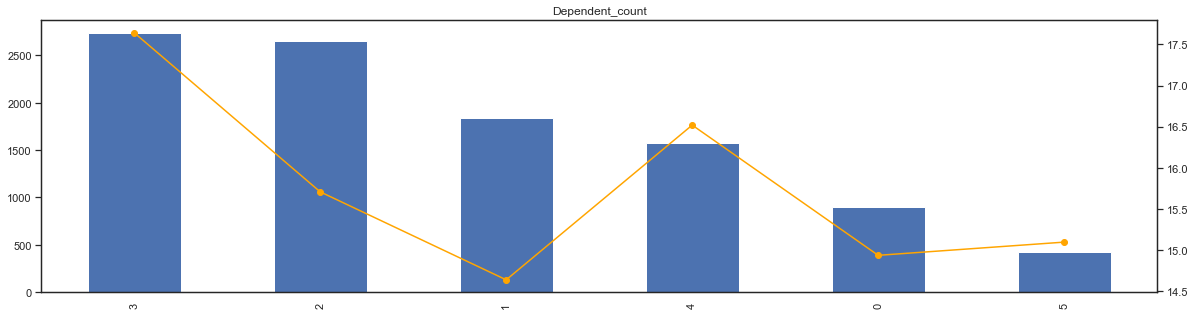

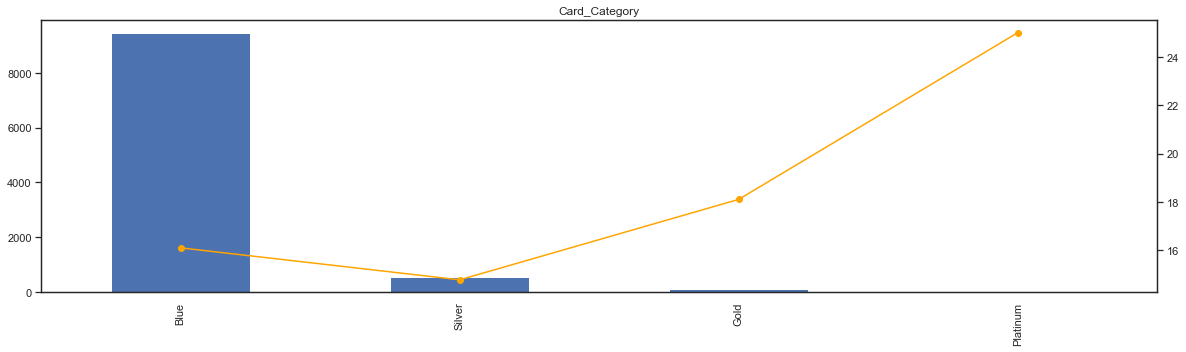

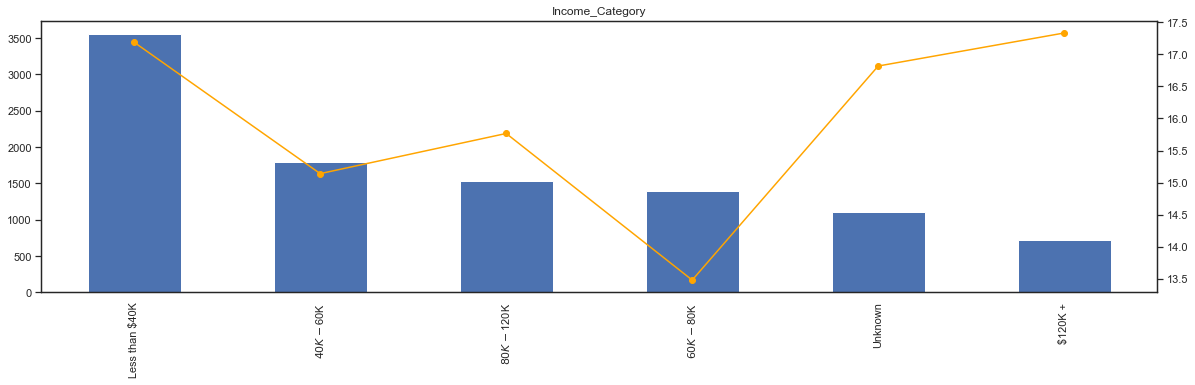

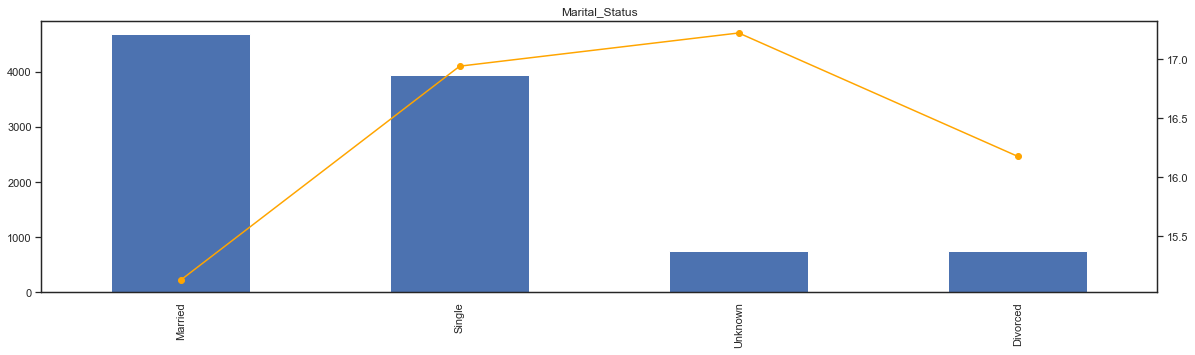

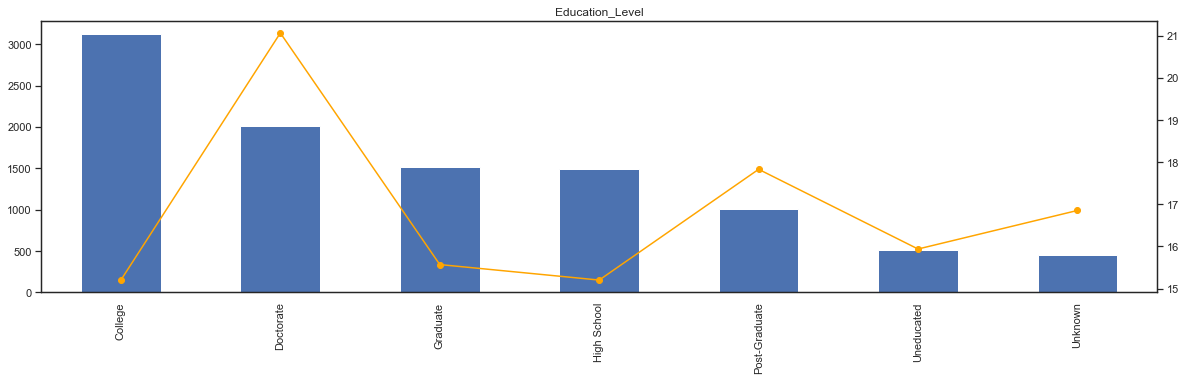

In [18]:
#looking at the relationship between Attrition and Categorical Variables
data['Dependent_count']=data['Dependent_count'].astype('str')

for item in Categorical_Variables:
    All_customers=data[item].value_counts()
    Attrited_customers = data[item][data['Attrition_Flag']=="Attrited Customer"].value_counts()
    Percentage_Attrition =  Attrited_customers/All_customers*100
    fig, ax = plt.subplots()
    ax1=data[item].value_counts(ascending=False).plot(kind='bar')
    ax2=ax1.twinx()   
    ax2.plot(Percentage_Attrition,marker='o',linestyle='-',color='orange')
    plt.title(item)
plt.show()

**Observations:**
- We can clearly see that Card_Category(Blue card), Gender(F), and Income_Category(<40K) and Education Level (Grad) have the most effect on Attrition as they have the highest number of attrited customers.
- The visuals indicate that customers with the previously mentioned attributes are more likely to churn than other customers.

In [19]:
#checking the number of unique values of our categorical variables
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Attrition_Flag': 2,
 'Gender': 2,
 'Dependent_count': 6,
 'Education_Level': 7,
 'Marital_Status': 4,
 'Income_Category': 6,
 'Card_Category': 4}

In [20]:
#checking the unique values of our categorical variables
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Dependent_count': ['3', '5', '4', '2', '0', '1'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [21]:
data['Education_Level'].mode()

0    Graduate
dtype: object

In [22]:
data['Income_Category'].mode()

0    Less than $40K
dtype: object

In [23]:
#Replacing Uknown missing values with Np NaN
data['Dependent_count']=data['Dependent_count'].astype('object')
data = data.replace('Unknown',np.NaN)
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [27]:
def get_IV(df, feature, target):
    
    lst = []

    unique_values = df[feature].unique()
    for val in unique_values:
        lst.append([feature,                                                        # Feature name
                    val,                                                            # Value of a feature (unique)
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (Existing == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]   # Bad  (Attrited == 1)
                   ])
 
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'Good', 'Bad'])

        
    total_bad = df[df[target] == 1].count()[feature]
    total_good = df.shape[0] - total_bad
    
    data['Distribution Good'] = data['Good']/ total_good
    data['Distribution Bad'] = data['Bad'] / total_bad
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    iv = data['IV'].sum()

    return iv

In [129]:
#Define encoding for Categorical Variables

def binary_encode(df, column, positive_value):
    df=df.copy()
    df[column]= df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df=df.copy()
    df[column]=df[column].apply(lambda x: ordering.index (x))
    return df

In [130]:

df_iv = binary_encode(data,'Attrition_Flag',"Attrited Customer")
df_iv= df_iv.drop(Numerical_Variables,axis=1)
df_iv

for item in Categorical_Variables:
         IV = get_IV(df_iv, item, "Attrition_Flag")
         print(item, IV)

Gender 0.010364912749936738
Dependent_count 0.006904913334837159
Card_Category 0.0014999766892839534
Income_Category 0.027351185848433122
Marital_Status 0.011885722781420638
Education_Level 0.04163397832910977


Based on the IV values above:
- Education level and Income Category are weak predictors for attritions while other Categorical Variabales are useless for prediction.  

In [131]:
#Dropping nonsignificant variables from dataframe
Non_signific_vars = ['Gender','Dependent_count','Card_Category','Marital_Status','Customer_Age','Months_on_book',
                     'Avg_Open_To_Buy']
df_signific_vars = data.drop(Non_signific_vars,axis=1)
df_signific_vars

,Attrition_Flag,Education_Level,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,High School,$60K - $80K,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,Existing Customer,Graduate,Less than $40K,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,Existing Customer,Graduate,$80K - $120K,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,High School,Less than $40K,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,Uneducated,$60K - $80K,5,1,0,4716.0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,Graduate,$40K - $60K,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462
10123,Attrited Customer,NaN,$40K - $60K,4,2,3,4277.0,2186,0.804,8764,69,0.683,0.511
10124,Attrited Customer,High School,Less than $40K,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,Graduate,$40K - $60K,4,3,3,5281.0,0,0.535,8395,62,0.722,0.000


# Preprocessing

In [132]:
def preprocess_vars (df):
    
    #Make a copy of dataframe
    df=df.copy()
    
    #Replace NA with mode of column
    df['Education_Level']=df['Education_Level'].fillna('Graduate')
    df['Income_Category']= df['Income_Category'].fillna('Less than $40K')
    
    #Encode binary columns
    df=binary_encode(df,'Attrition_Flag',"Attrited Customer")
    
    #Encode ordinal columns
    education_ordering=[
        'Uneducated',
        'High School',
        'College',
        'Graduate',
        'Post-Graduate',
        'Doctorate'
    ]
    income_ordering=[
        'Less than $40K',
        '$40K - $60K',
        '$60K - $80K',
        '$80K - $120K',
        '$120K +'
    ]
    
    df= ordinal_encode(df,'Education_Level',ordering = education_ordering)
    df= ordinal_encode(df,'Income_Category',ordering = income_ordering)
    
    
    #Split df into X and y
    
    y = df['Attrition_Flag'].copy()
    X = df.drop('Attrition_Flag',axis=1).copy()
    
   #Scale X with a standard scaler 
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
    
    return X, y

In [134]:
X, y = preprocess_vars(df_signific_vars)

In [135]:
X

,Education_Level,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.893680,0.597300,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.593388,-0.887628,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.593388,1.339764,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.893680,-0.887628,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-1.637214,0.597300,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,-1.056263,-1.570365,7.509325,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.593388,-0.145164,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.259771,3.259358,2.221481,0.608119,0.678714
10123,0.593388,-0.145164,0.120579,-0.337598,0.492404,-0.479181,1.255524,0.201004,1.283475,0.176440,-0.122745,0.856458
10124,-0.893680,-0.887628,0.763943,0.651940,1.396424,-0.354626,-1.426858,0.269436,1.732994,-0.207005,0.444305,-0.997155
10125,0.593388,-0.145164,0.120579,0.651940,0.492404,-0.368710,-1.426858,-1.026208,1.174848,-0.121795,0.041070,-0.997155


In [136]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

# Training Model

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=123)

In [138]:
#Logistic Regression
Logisticreg = LogisticRegression()
Logisticreg.fit(X_train,y_train)
predictions = Logisticreg.predict(X_test)
train_score = Logisticreg.score(X_train,y_train)
print("Logistic Regression Accuracy score for training the model = " , "{:.2f}%".format(train_score * 100))
test_score = Logisticreg.score(X_test, y_test)
print("Logistic Regression Accuracy score for testing the model = " , "{:.2f}%".format(test_score * 100))

Logistic Regression Accuracy score for training the model =  90.07%
Logistic Regression Accuracy score for testing the model =  89.54%


In [139]:
#Confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm= metrics.confusion_matrix(y_test,predictions)
cr= classification_report(y_test, predictions)
print(cm)
print(cr)

[[2465  107]
 [ 211  256]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2572
           1       0.71      0.55      0.62       467

    accuracy                           0.90      3039
   macro avg       0.81      0.75      0.78      3039
weighted avg       0.89      0.90      0.89      3039



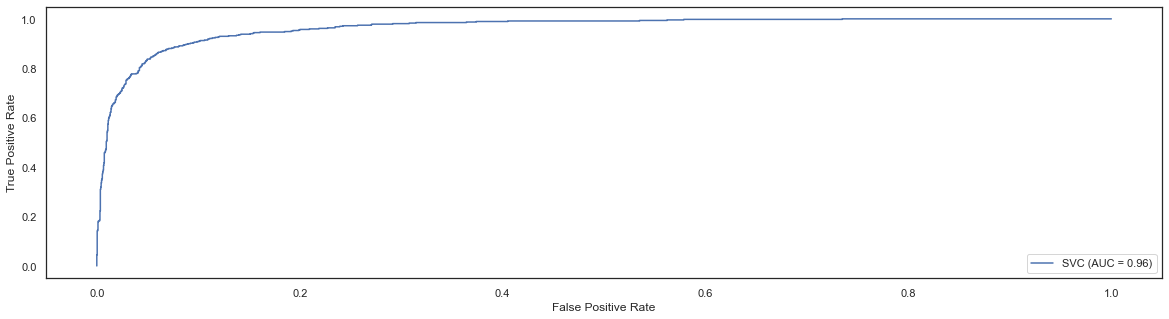

In [140]:
from sklearn import svm
from sklearn.metrics import plot_roc_curve
clf = svm.SVC(random_state=123,probability=True)
clf = clf.fit(X_train,y_train)
plot_roc_curve(clf,X_test,y_test)
plt.show()

In [142]:
! pip install scikit-plot
import scikitplot as skplt

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

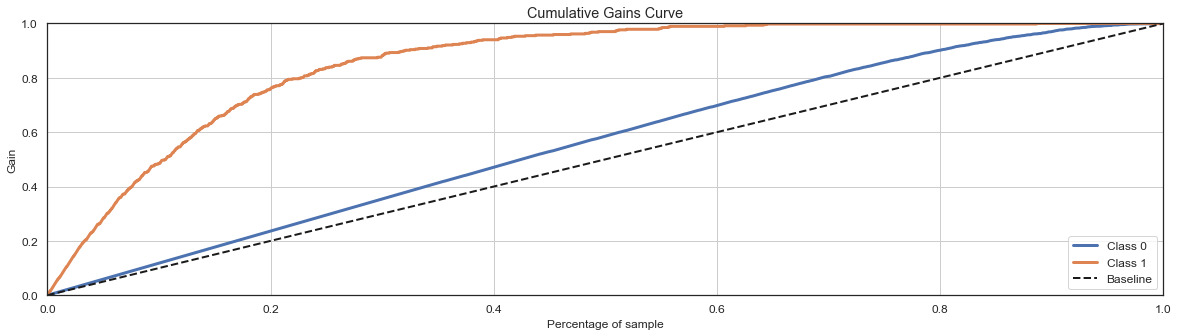

In [143]:
y_probas = Logisticreg.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

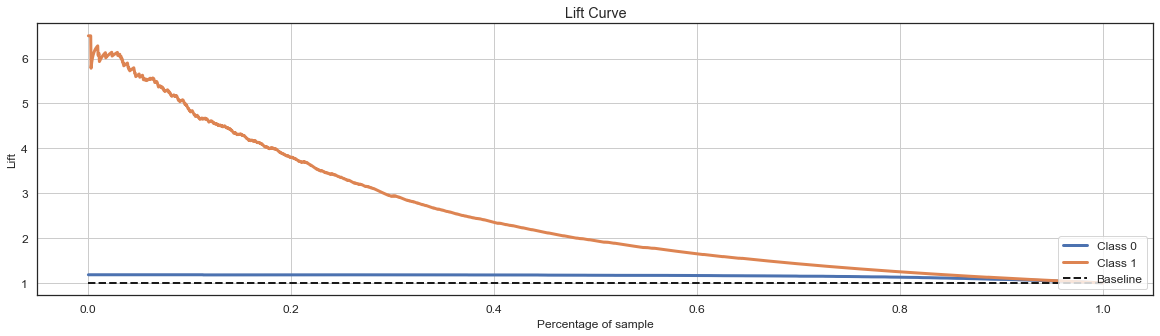

In [144]:
skplt.metrics.plot_lift_curve(y_test, y_probas)

Observation:
- If we were to reach out to 20% of our customer base we would recall 20% of attritions,
but if we reach out to top 20% based on model score we would be able to recall 78% of actual attritions improving the marketing ROI by 4 times.